#### Imports

In [23]:
#!pip install datasets
from datasets import load_dataset

#import warnings
#warnings.filterwarnings("ignore")

import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

print("Setup Complete")

Setup Complete


#### Chargement des données

In [41]:
ds = load_dataset("criteo/FairJob")
df = ds['train'].to_pandas()

In [58]:
protected_attribute_counts = list(df.groupby('user_id')['protected_attribute'].unique())

print(protected_attribute_counts.sum())

30361


#### Statistiques Descriptives

In [25]:
print(df.info())

n_cat_var = len(df.select_dtypes(include=['float64']).columns)
n_num_var = len(df.select_dtypes(include=["int64"]).columns)

print(f'\nnombre de variables catégoriques : {n_cat_var}')
print(f'nombre de variables numériques : {n_num_var}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072226 entries, 0 to 1072225
Data columns (total 56 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   click                1072226 non-null  int64  
 1   protected_attribute  1072226 non-null  int64  
 2   senior               1072226 non-null  int64  
 3   displayrandom        1072226 non-null  int64  
 4   rank                 1072226 non-null  int64  
 5   user_id              1072226 non-null  int64  
 6   impression_id        1072226 non-null  int64  
 7   product_id           1072226 non-null  int64  
 8   cat0                 1072226 non-null  int64  
 9   cat1                 1072226 non-null  int64  
 10  cat2                 1072226 non-null  int64  
 11  cat3                 1072226 non-null  int64  
 12  cat4                 1072226 non-null  int64  
 13  cat5                 1072226 non-null  int64  
 14  cat6                 1072226 non-null  int64  
 15

In [16]:
df.isnull().sum()

click                  0
protected_attribute    0
senior                 0
displayrandom          0
rank                   0
user_id                0
impression_id          0
product_id             0
cat0                   0
cat1                   0
cat2                   0
cat3                   0
cat4                   0
cat5                   0
cat6                   0
cat7                   0
cat8                   0
cat9                   0
cat10                  0
cat11                  0
cat12                  0
num16                  0
num17                  0
num18                  0
num19                  0
num20                  0
num21                  0
num22                  0
num23                  0
num24                  0
num25                  0
num26                  0
num27                  0
num28                  0
num29                  0
num30                  0
num31                  0
num32                  0
num33                  0
num34                  0


In [26]:
df.head()

,click,protected_attribute,senior,displayrandom,rank,user_id,impression_id,product_id,cat0,cat1,...,num41,num42,num43,num44,num45,num46,num47,num48,num49,num50
0,0,0,1,1,1,31020,175316,45953,6,6,...,-0.333033,-0.542801,0.074884,-0.751637,-0.299223,-0.647541,-0.252768,-0.577173,-0.264359,-0.737299
1,0,0,1,0,3,515,129699,10569,8,8,...,-0.333033,-0.542801,-0.258659,0.503731,-0.523668,1.088225,0.935563,-0.577173,0.507790,0.610287
2,0,1,1,0,1,12859,134573,51550,6,6,...,-0.333033,-0.542801,-0.236209,-0.111510,0.084159,0.422154,-0.160055,-0.577173,-0.264359,-0.063506
3,0,1,1,0,1,18781,84169,17843,3,3,...,-0.333033,-0.542801,-0.393358,-0.987701,-0.523668,-0.778977,-0.345480,-0.577173,4.368537,-0.996450
4,0,0,1,0,9,19283,76506,11354,8,8,...,-0.333033,-0.542801,1.553377,-0.636441,-0.523668,-0.541088,-0.345480,-0.577173,-0.264359,-0.581808


In [27]:
cat_var = [col for col in df.columns if col.startswith('cat')]
categorical_features_cardinality = {col: df[col].nunique() for col in cat_var}
print(pd.DataFrame(list(categorical_features_cardinality.items()), columns=['Feature', 'Cardinality']))

   Feature  Cardinality
0     cat0            9
1     cat1            9
2     cat2         1025
3     cat3           98
4     cat4          122
5     cat5         1296
6     cat6         2492
7     cat7         3183
8     cat8         3541
9     cat9         2879
10   cat10         2314
11   cat11         1436
12   cat12          912


In [31]:
binary_features = ['protected_attribute', 'senior', 'displayrandom', 'click']
stat_variables_binaires = { var : round(df[var].value_counts(normalize=True)[1],3)*100 for var in binary_features}
print(pd.DataFrame(list(stat_variables_binaires.items()), columns=['Feature', 'Pourcentage de 1']))

               Feature  Pourcentage de 1
0  protected_attribute              50.0
1               senior              66.6
2        displayrandom               9.9
3                click               0.7


#### Visualisation

##### Labels 

répartition de la classe 'click' : 
 No click : 1064737
 Click : 7489

Fréquence de la classe 'click' : 
 No click : 99.3 %
 Click : 0.7 %


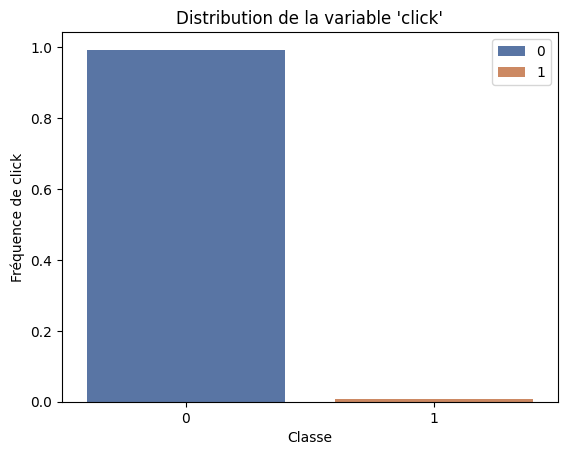

In [42]:
n0, n1 = df['click'].value_counts()
print("répartition de la classe 'click' : ")
print(f' No click : {n0}')
print(f' Click : {n1}')

print("\nFréquence de la classe 'click' : ")
print(f' No click : {round(n0/(n0+n1)*100, 2)} %')
print(f' Click : {round(n1/(n0+n1)*100, 2)} %')


sns.barplot(x = [0,1], y = np.array([n0, n1])/(n0+n1), hue = [0,1], palette='deep',legend=True)
plt.xlabel('Classe')
plt.ylabel('Fréquence de click')
plt.title("Distribution de la variable 'click'")
plt.show()

répartition de la classe 'protected_attribute' : 
 Female : 536113
 Male : 536113

Fréquence de la classe 'protected_attribute' : 
 Female : 50.0 %
 Male : 50.0 %


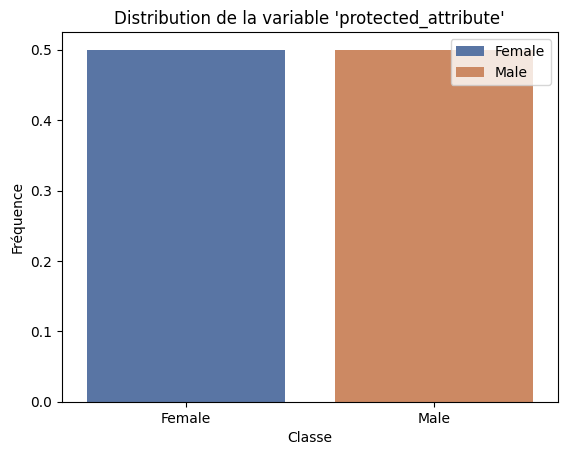

In [68]:
n0, n1 = df['protected_attribute'].value_counts()
print("répartition de la classe 'protected_attribute' : ")
print(f' Female : {n0}')
print(f' Male : {n1}')

print("\nFréquence de la classe 'protected_attribute' : ")
print(f' Female : {round(n0/(n0+n1)*100, 2)} %')
print(f' Male : {round(n1/(n0+n1)*100, 2)} %')


sns.barplot(x = ['Female','Male'], y = np.array([n0, n1])/(n0+n1), hue = ['Female','Male'], palette='deep',legend=True)
plt.xlabel('Classe')
plt.ylabel('Fréquence')
plt.title("Distribution de la variable 'protected_attribute'")
plt.show()

protected_attribute     0     1
click                          
0                    50.0  50.0
1                    52.2  47.8


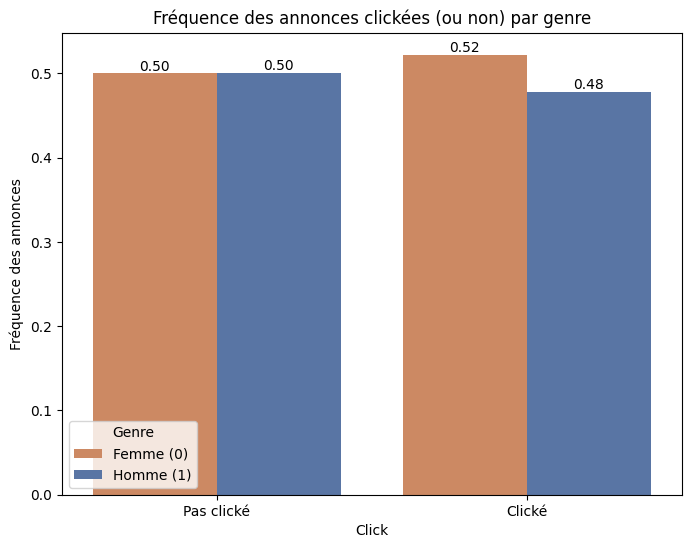

In [71]:
# Création du tableau croisé avec les fréquences par rapport à chaque groupe de click (normalisation par ligne)
tableau = pd.crosstab(index=df["click"], columns=df["protected_attribute"], normalize='index')
print(tableau.round(3)*100)

# Transformation en format long pour Seaborn
tableau_melted = tableau.reset_index().melt(id_vars="click", var_name="protected_attribute", value_name="frequency")

# Création du barplot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=tableau_melted, x="click", y="frequency", hue="protected_attribute", palette=["#dd8452", "#4c72b0"])

# Récupérer les handles et labels corrects de la légende
handles, labels = ax.get_legend_handles_labels()

# Remplacement des labels de la légende pour correspondre à "Homme" et "Femme"
plt.legend(handles=handles, labels=["Femme (0)", "Homme (1)"], title="Genre")
plt.xlabel("Click")
plt.ylabel("Fréquence des annonces")
plt.title("Fréquence des annonces clickées (ou non) par genre")
plt.xticks(ticks=[0, 1], labels=["Pas clické", "Clické"])  # Noms des groupes

# Ajout des fréquences au-dessus des barres
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

# Affichage
plt.show()


répartition de la classe 'senior' : 
 Non-senior : 713659
 Senior : 358567

Fréquence de la classe 'click' : 
 Non-senior : 66.56 %
 Senior : 33.44 %


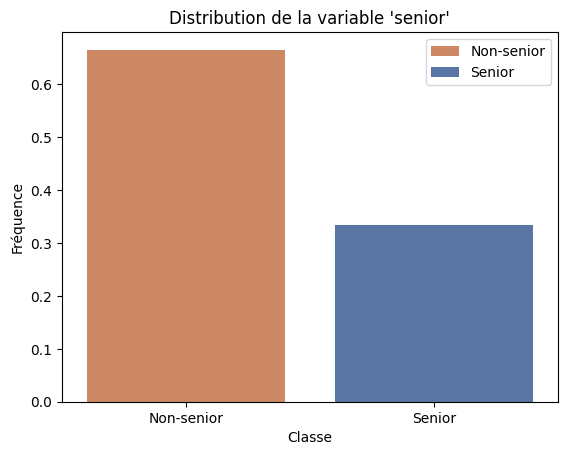

In [45]:
n0, n1 = df['senior'].value_counts()
print("répartition de la classe 'senior' : ")
print(f' Non-senior : {n0}')
print(f' Senior : {n1}')

print("\nFréquence de la classe 'click' : ")
print(f' Non-senior : {round(n0/(n0+n1)*100, 2)} %')
print(f' Senior : {round(n1/(n0+n1)*100, 2)} %')


sns.barplot(x = ['Non-senior','Senior'], y = np.array([n0, n1])/(n0+n1), hue = ['Non-senior','Senior'], palette=["#dd8452", "#4c72b0"],legend=True)
plt.xlabel('Classe')
plt.ylabel('Fréquence')
plt.title("Distribution de la variable 'senior'")
plt.show()

protected_attribute       0       1
senior                             
0                    191256  167311
1                    344857  368802


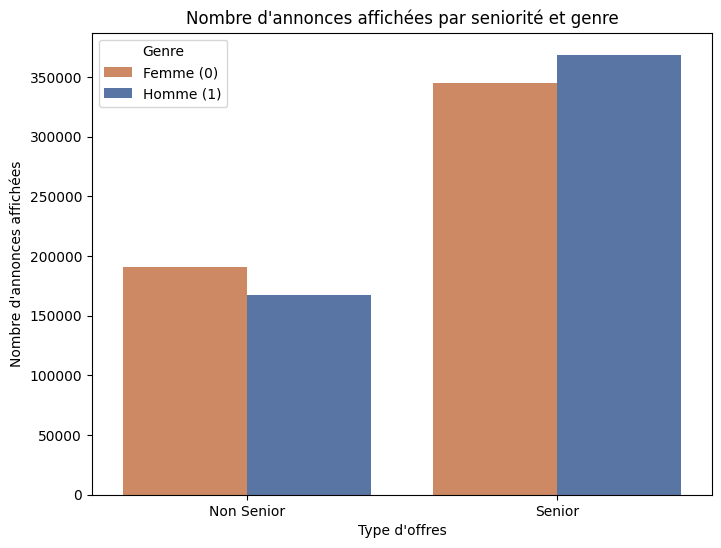

In [72]:
# Création du tableau croisé avec le nombre d'occurrences
tableau = pd.crosstab(index=df["senior"], columns=df["protected_attribute"])
print(tableau)

# Transformation en format long pour Seaborn
tableau_melted = tableau.reset_index().melt(id_vars="senior", var_name="protected_attribute", value_name="count")

# Création du barplot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=tableau_melted, x="senior", y="count", hue="protected_attribute", palette=["#dd8452", "#4c72b0"])

# Récupérer les handles et labels corrects de la légende
handles, labels = ax.get_legend_handles_labels()

# Remplacement des labels de la légende pour correspondre à "Homme" et "Femme"
plt.legend(handles=handles, labels=["Femme (0)", "Homme (1)"], title="Genre")
plt.xlabel("Type d'offres")
plt.ylabel("Nombre d'annonces affichées")
plt.title("Nombre d'annonces affichées par seniorité et genre")
plt.xticks(ticks=[0, 1], labels=["Non Senior", "Senior"])  # Noms des groupes

# Affichage
plt.show()


protected_attribute         0         1
senior                                 
0                    0.533390  0.466610
1                    0.483224  0.516776


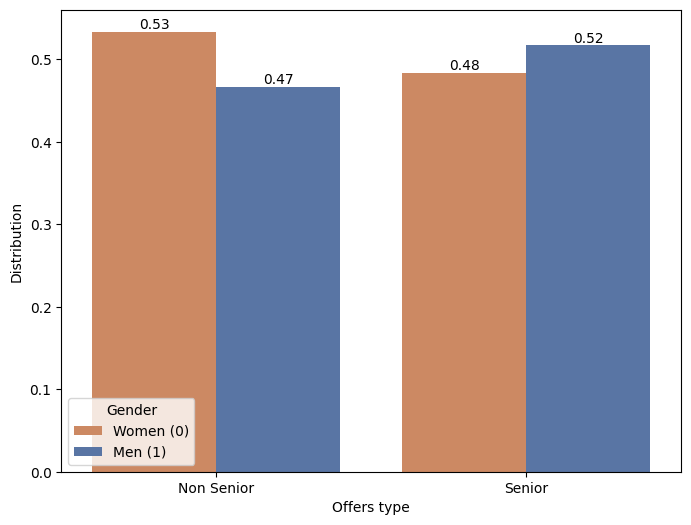

In [75]:
# Création du tableau croisé avec les fréquences
tableau = pd.crosstab(index=df["senior"], columns=df["protected_attribute"], normalize='index')
print(tableau)

# Transformation en format long pour Seaborn
tableau_melted = tableau.reset_index().melt(id_vars="senior", var_name="protected_attribute", value_name="frequency")

# Création du barplot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=tableau_melted, x="senior", y="frequency", hue="protected_attribute", palette=["#dd8452", "#4c72b0"])

# Récupérer les handles et labels corrects de la légende
handles, labels = ax.get_legend_handles_labels()

# Remplacement des labels de la légende pour correspondre à "Homme" et "Femme"
plt.legend(handles=handles, labels=["Women (0)", "Men (1)"], title="Gender")
plt.xlabel("Offers type")
plt.ylabel("Distribution")
#plt.title("Distribution of Displayed Job Offers by Seniority and Gender")
plt.xticks(ticks=[0, 1], labels=["Non Senior", "Senior"])  # Noms des groupes

# Ajout des fréquences au-dessus des barres
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

# Affichage
plt.show()

protected_attribute         0         1
senior                                 
0                    0.581470  0.418530
1                    0.497546  0.502454


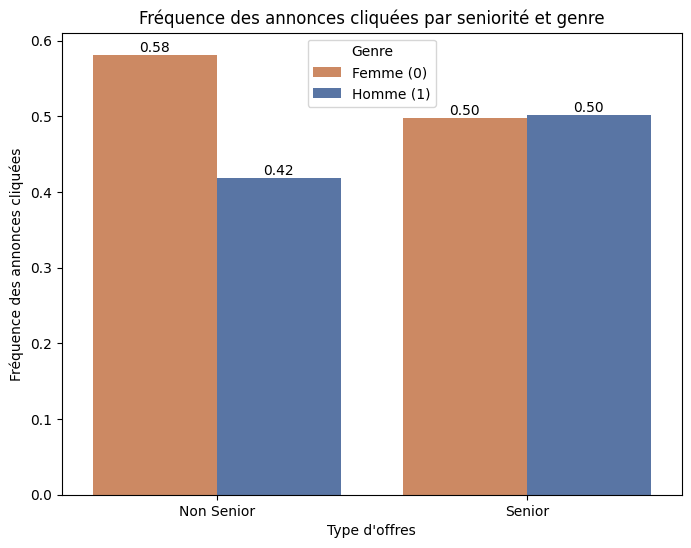

In [39]:
df_clicked = df[df['click'] == 1]

# Création du tableau croisé avec les fréquences
tableau = pd.crosstab(index=df_clicked["senior"], columns=df_clicked["protected_attribute"], normalize='index')
print(tableau)

# Transformation en format long pour Seaborn
tableau_melted = tableau.reset_index().melt(id_vars="senior", var_name="protected_attribute", value_name="frequency")

# Création du barplot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=tableau_melted, x="senior", y="frequency", hue="protected_attribute", palette=["#dd8452", "#4c72b0"])

# Récupérer les handles et labels corrects de la légende
handles, labels = ax.get_legend_handles_labels()

# Remplacement des labels de la légende pour correspondre à "Homme" et "Femme"
plt.legend(handles=handles, labels=["Femme (0)", "Homme (1)"], title="Genre")
plt.xlabel("Type d'offres")
plt.ylabel("Fréquence des annonces cliquées")
plt.title("Fréquence des annonces cliquées par seniorité et genre")
plt.xticks(ticks=[0, 1], labels=["Non Senior", "Senior"])  # Noms des groupes

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

# Affichage
plt.show()


/var/folders/x_/ly6z2_tx5mb34cscjdqkzd700000gn/T/ipykernel_12425/660731534.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=clicks_by_rank, x='rank', y='click', palette='viridis')


<Figure size 1200x600 with 0 Axes>

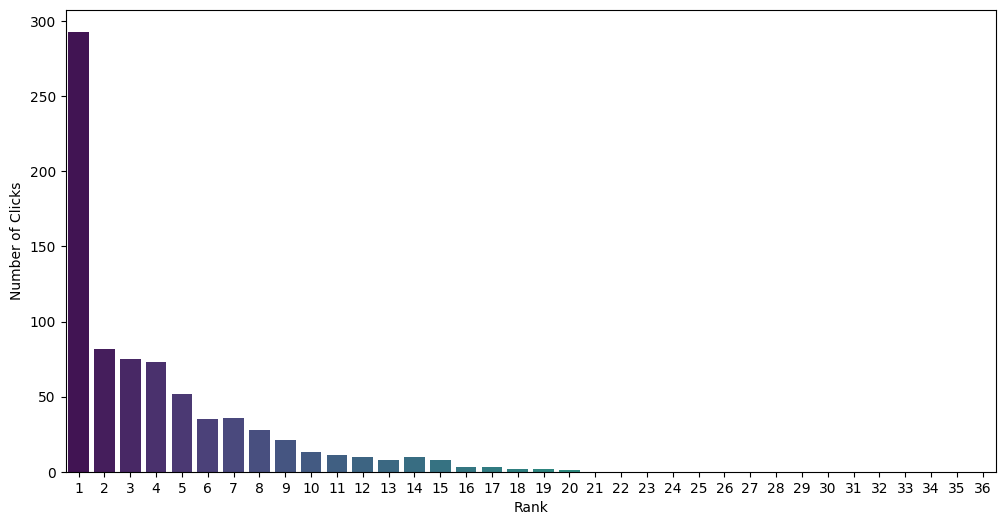

In [36]:
plt.figure(figsize=(12, 6))

# Number of clicks as a function of rank
clicks_by_rank = df[df['displayrandom'] == 1].groupby('rank')['click'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=clicks_by_rank, x='rank', y='click', palette='viridis')
#plt.title("Number of Clicks by Rank")
plt.xlabel('Rank')
plt.ylabel('Number of Clicks')
plt.show()

Frequency for random_display = 0:
click
0    0.993043
1    0.006957
Name: proportion, dtype: float64

Frequency for random_display = 1:
click
0    0.992765
1    0.007235
Name: proportion, dtype: float64


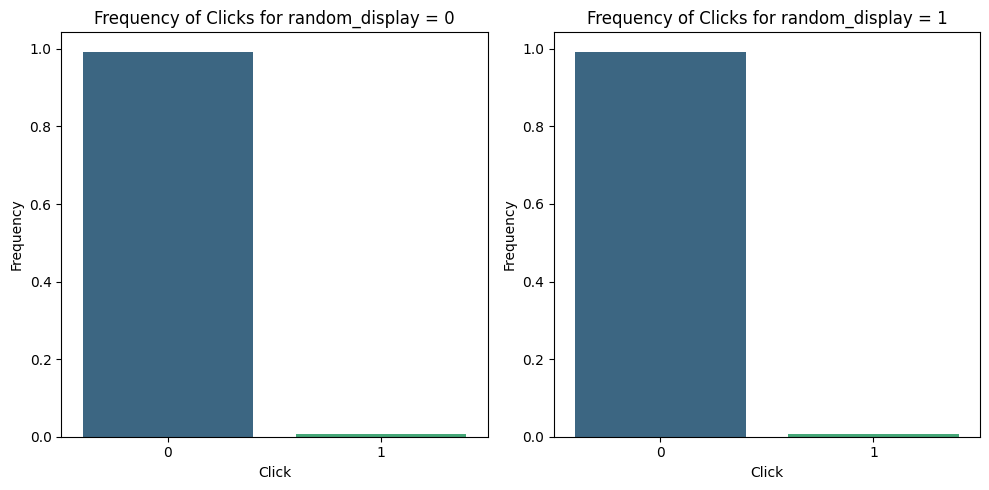

In [25]:
import warnings

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Your existing code

# Calculate the frequency of 0 and 1 for random_display = 0
freq_random_display_0 = df[df['displayrandom'] == 0]['click'].value_counts(normalize=True)

# Calculate the frequency of 0 and 1 for random_display = 1
freq_random_display_1 = df[df['displayrandom'] == 1]['click'].value_counts(normalize=True)

print("Frequency for random_display = 0:")
print(freq_random_display_0)

print("\nFrequency for random_display = 1:")
print(freq_random_display_1)
# Plotting the frequencies in a histogram
plt.figure(figsize=(10, 5))

# Histogram for random_display = 0
plt.subplot(1, 2, 1)
sns.barplot(x=freq_random_display_0.index, y=freq_random_display_0.values, palette='viridis')
plt.title('Frequency of Clicks for random_display = 0')
plt.xlabel('Click')
plt.ylabel('Frequency')

# Histogram for random_display = 1
plt.subplot(1, 2, 2)
sns.barplot(x=freq_random_display_1.index, y=freq_random_display_1.values, palette='viridis')
plt.title('Frequency of Clicks for random_display = 1')
plt.xlabel('Click')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##### Variables catégoriques

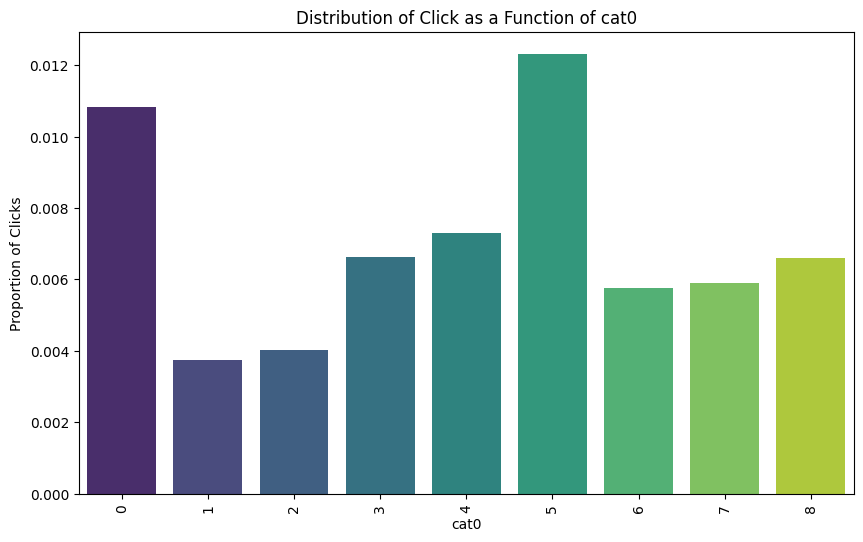

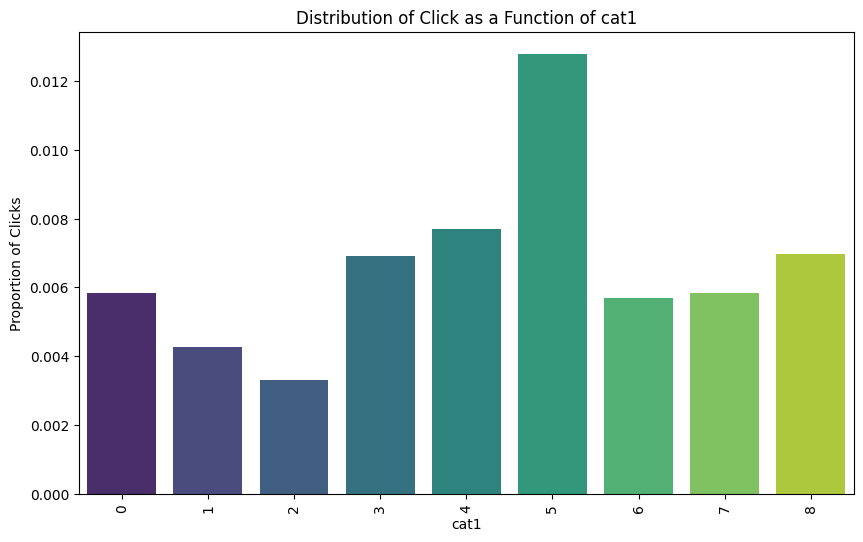

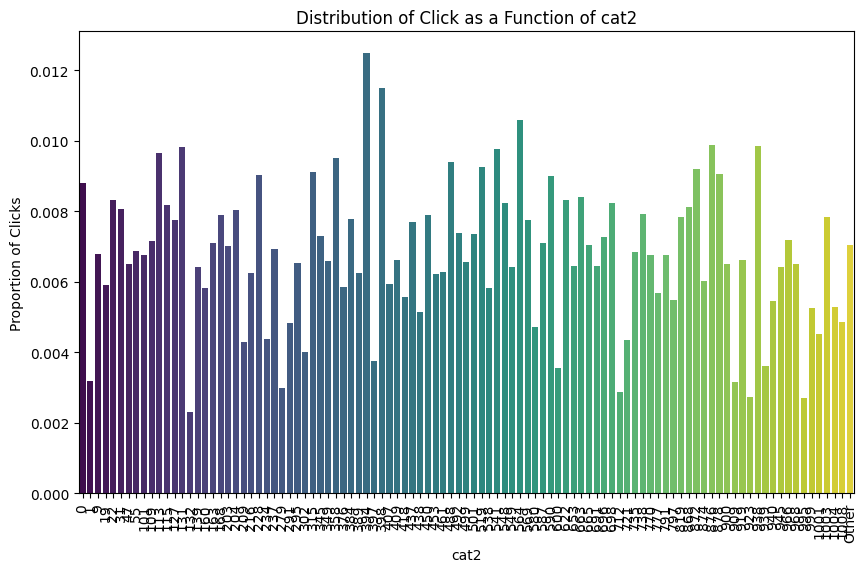

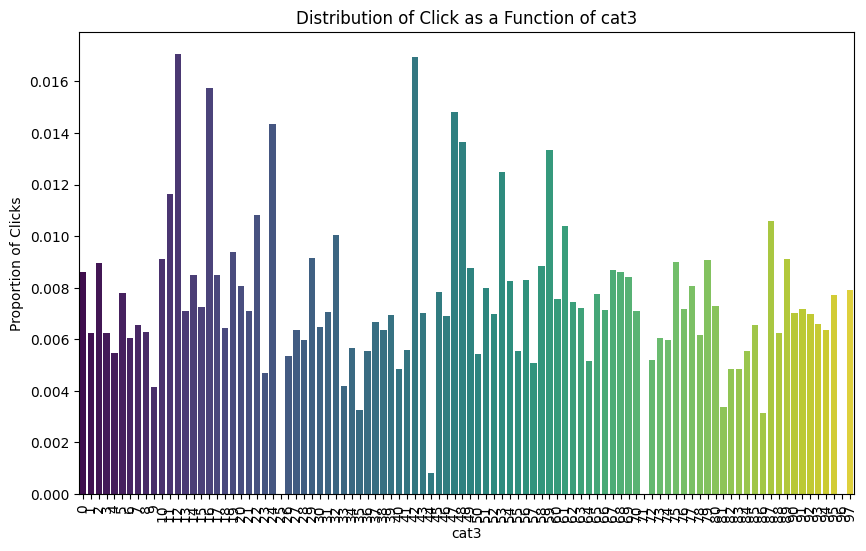

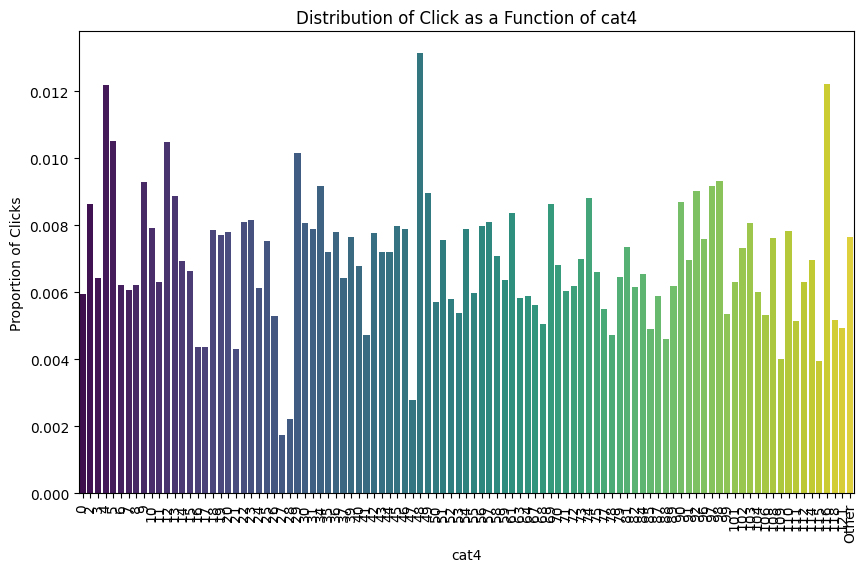

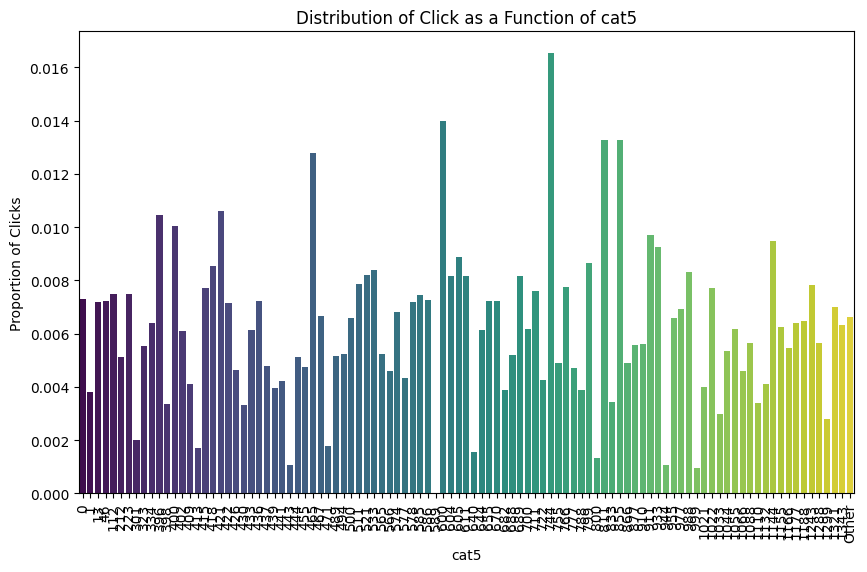

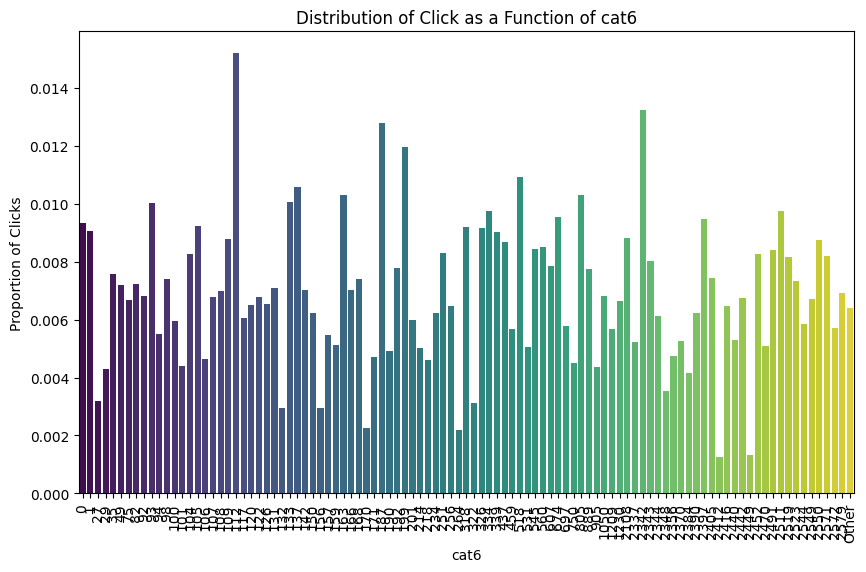

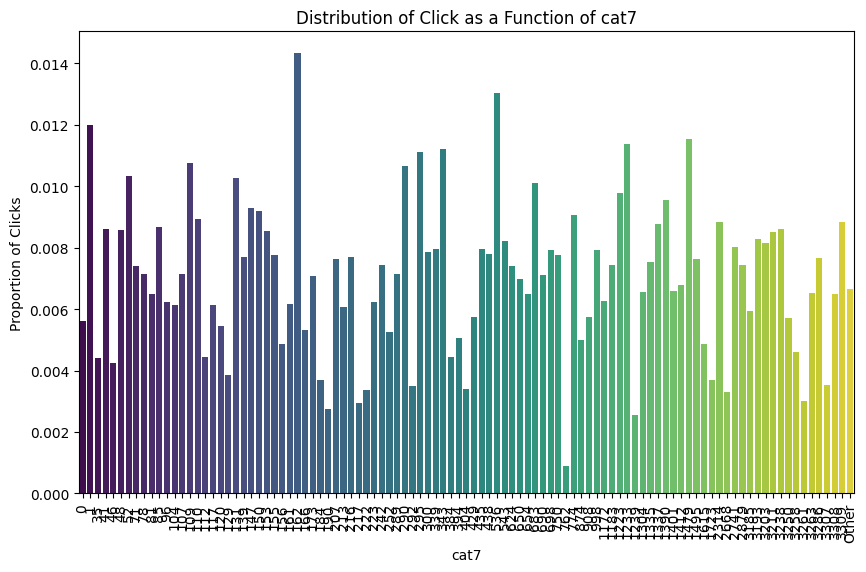

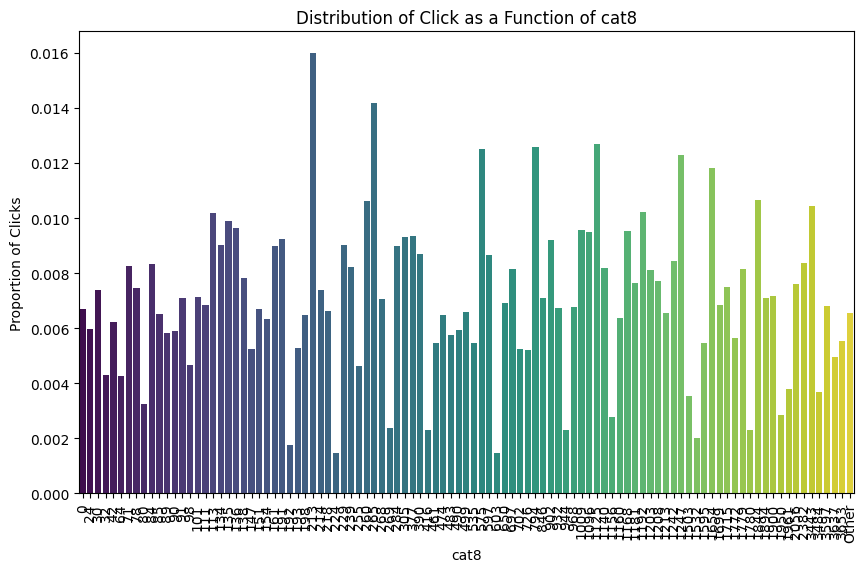

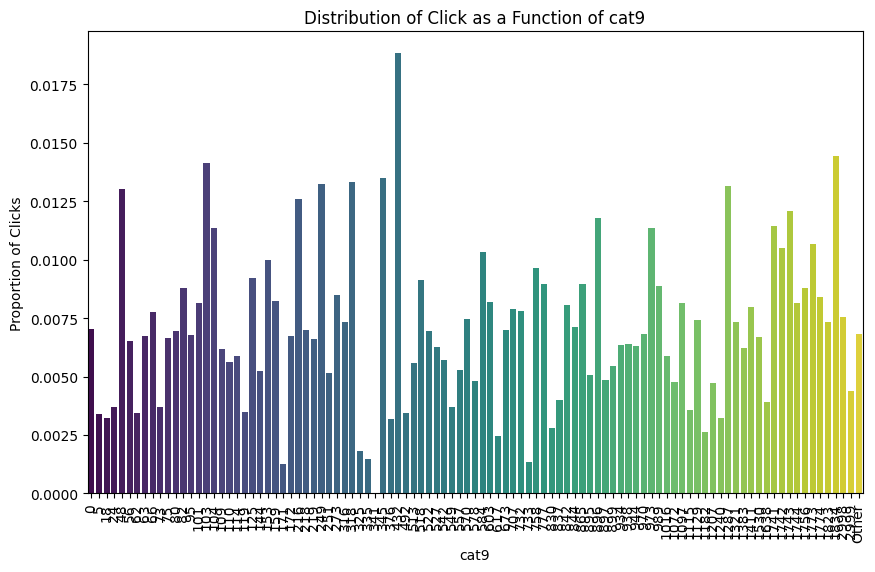

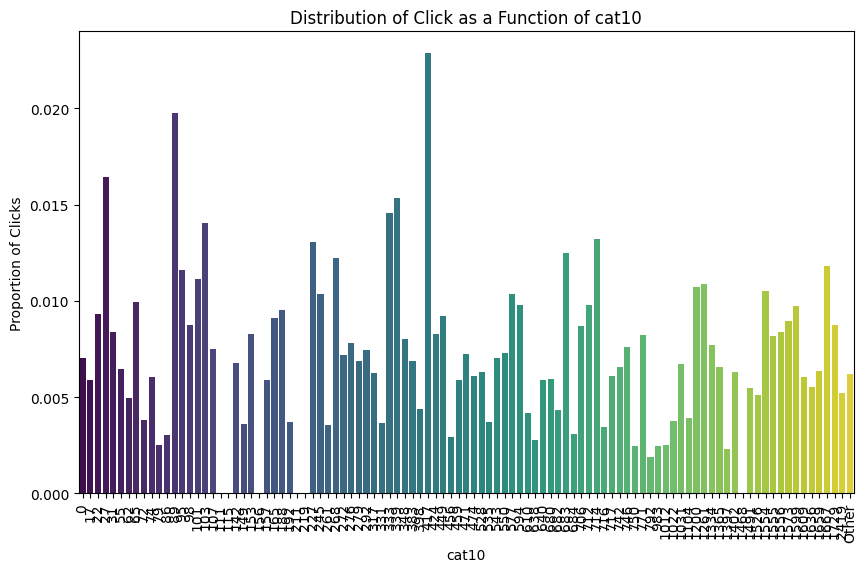

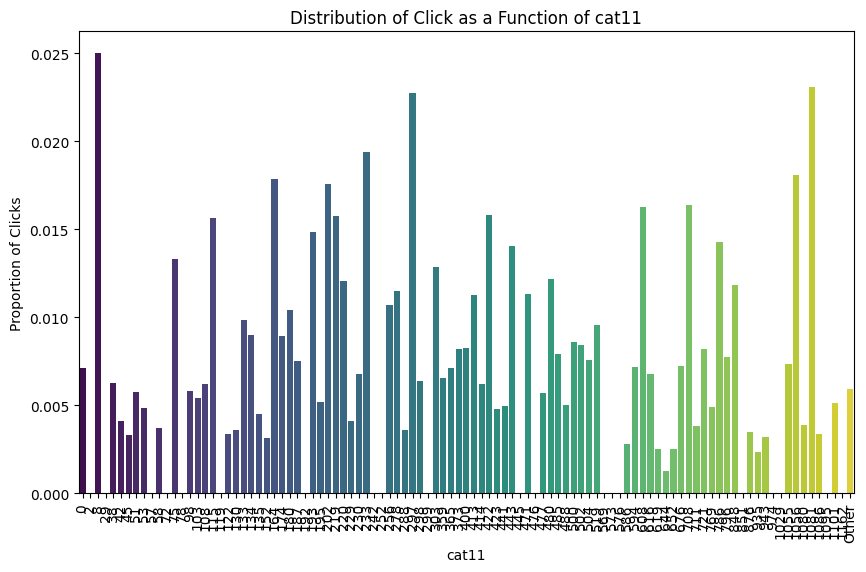

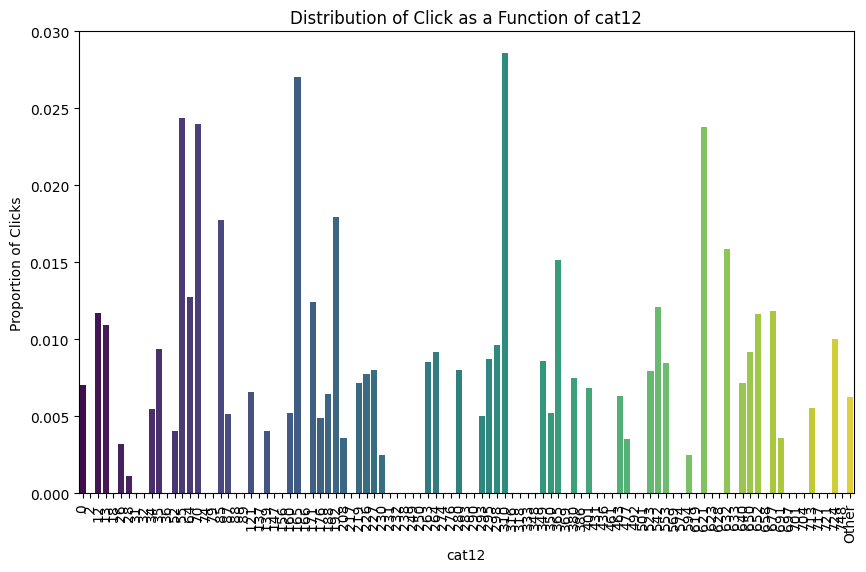

In [32]:
# List of categorical variables like car_i
car_vars = [col for col in df.columns if col.startswith('cat')]

# Plotting the distribution of click as a function of car variables
for var in car_vars:
    # Check the number of unique values
    unique_values = df[var].nunique()
    
    if unique_values > 100:
        # Group less frequent categories into 'Other'
        top_values = df[var].value_counts().nlargest(100).index
        df[var] = df[var].apply(lambda x: x if x in top_values else 'Other')
    
    # Create a crosstab
    crosstab = pd.crosstab(df[var], df['click'], normalize='index')
    
    # Plot the crosstab
    plt.figure(figsize=(10, 6))
    sns.barplot(x=crosstab.index, y=crosstab[1], palette='viridis')
    plt.title(f'Distribution of Click as a Function of {var}')
    plt.xlabel(var)
    plt.ylabel('Proportion of Clicks')
    plt.xticks(rotation=90)  # Rotate x labels if necessary
    plt.show()

##### Variables numériques

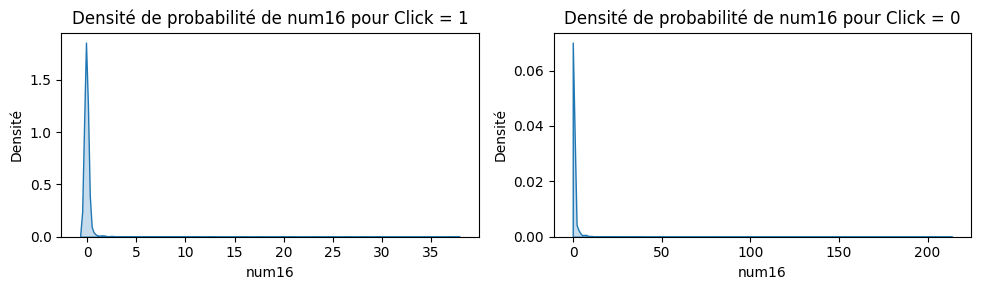

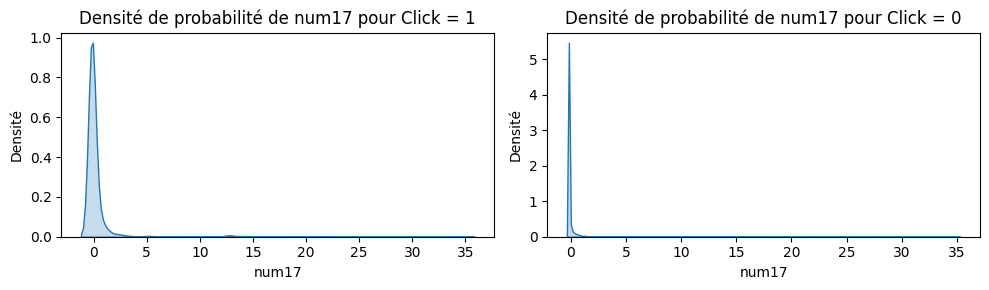

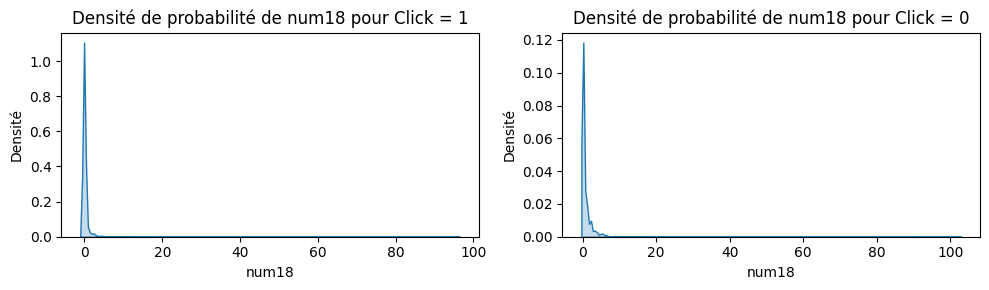

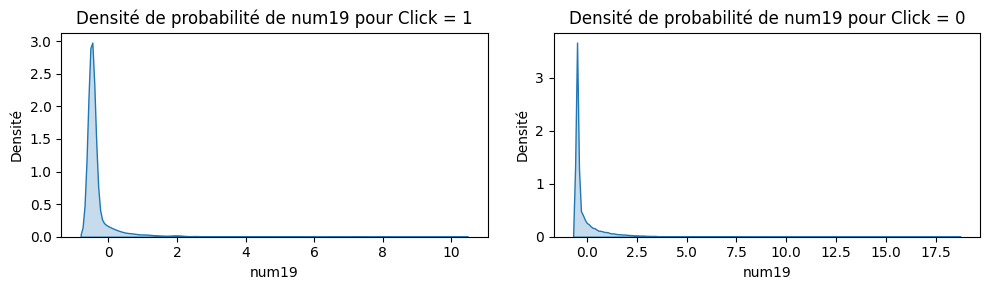

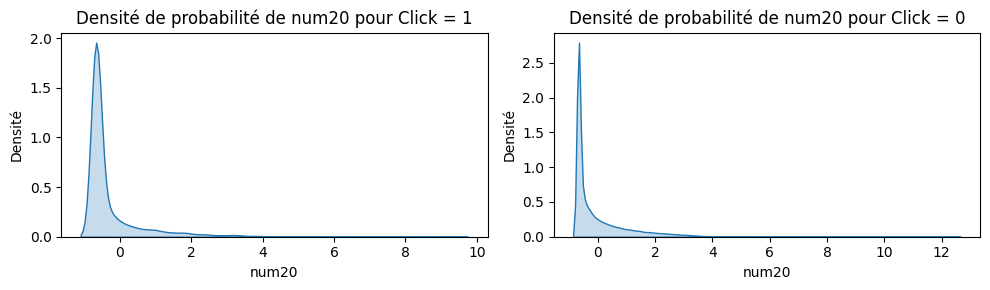

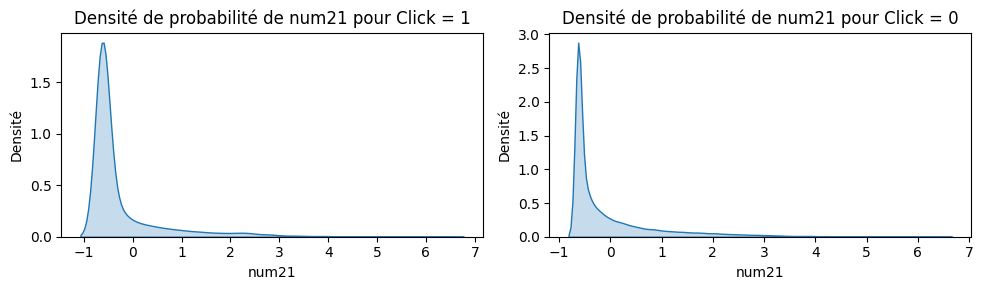

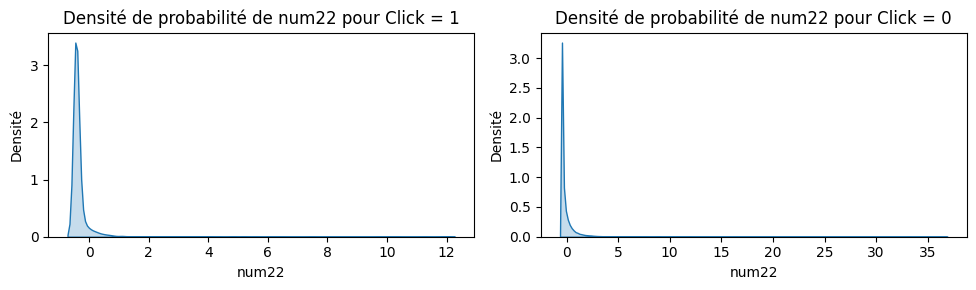

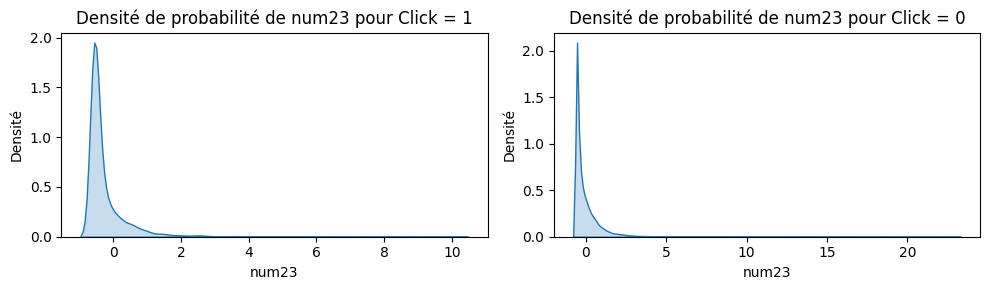

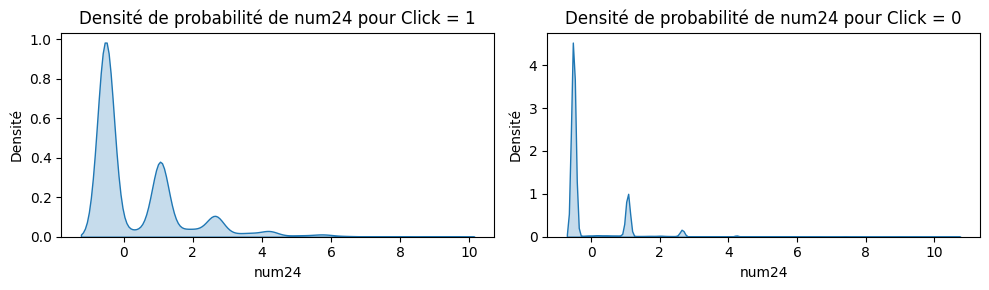

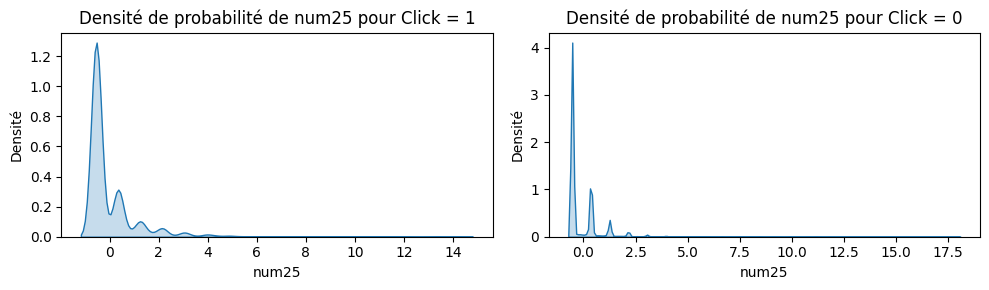

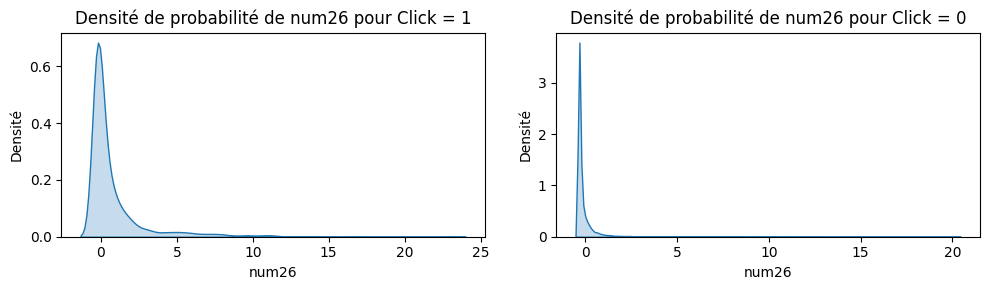

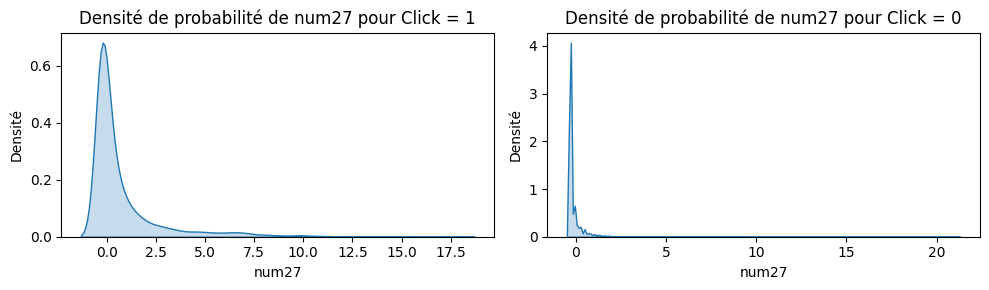

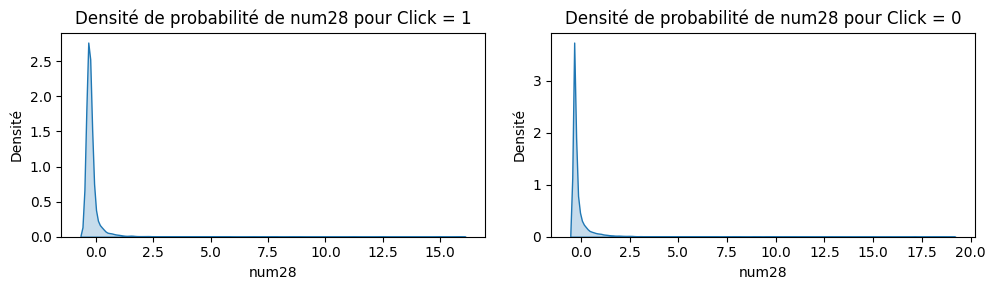

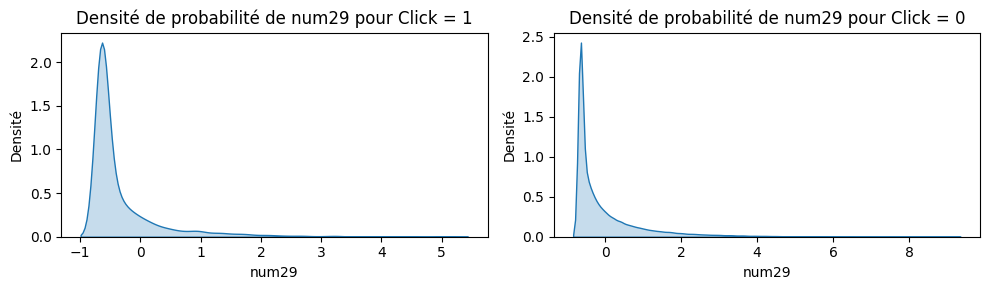

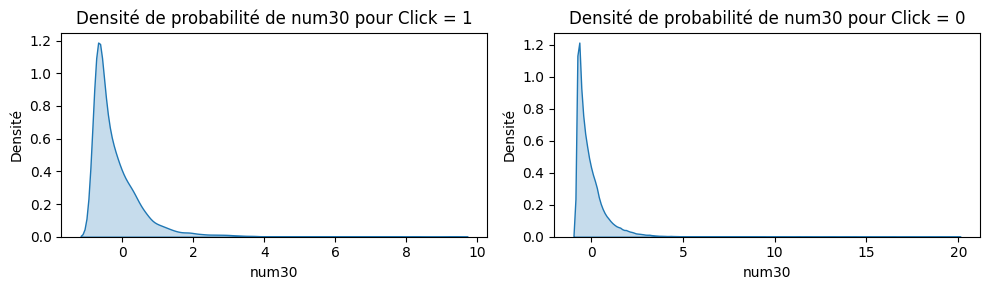

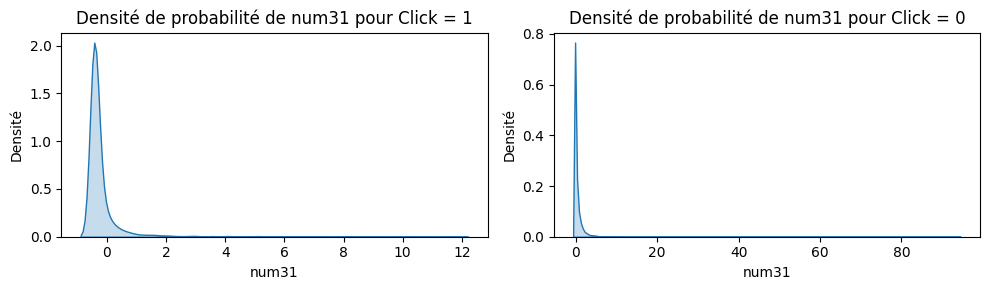

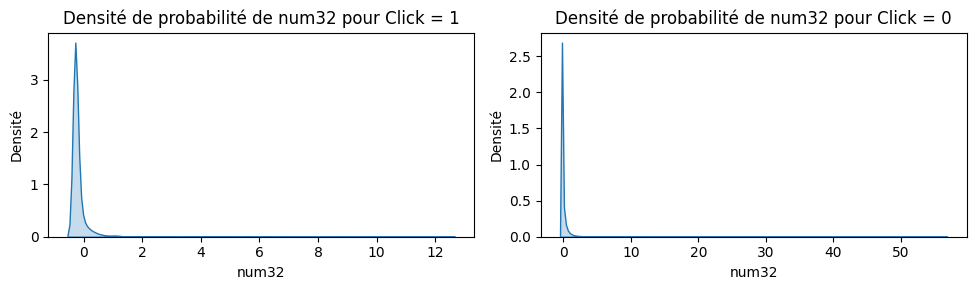

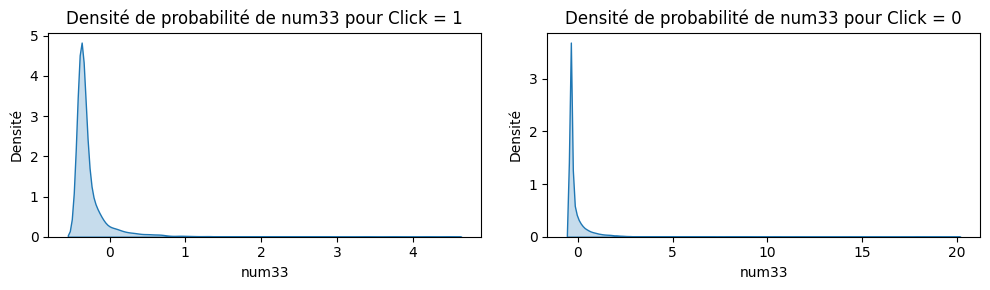

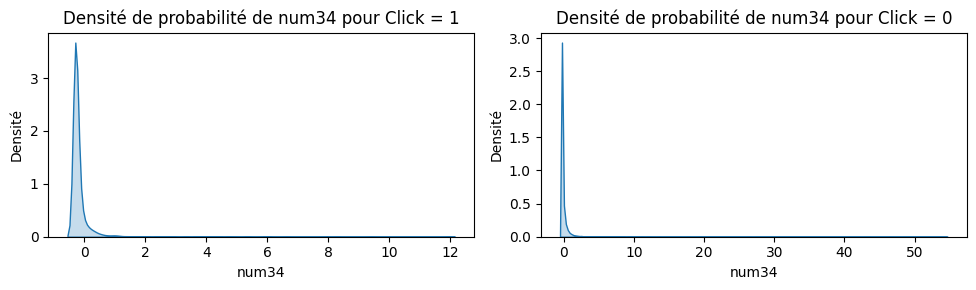

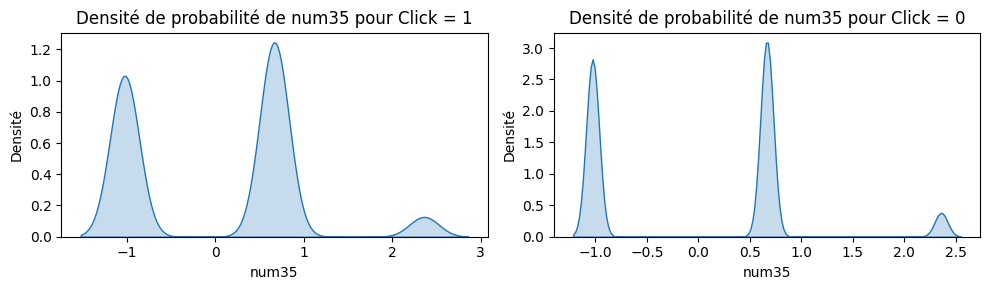

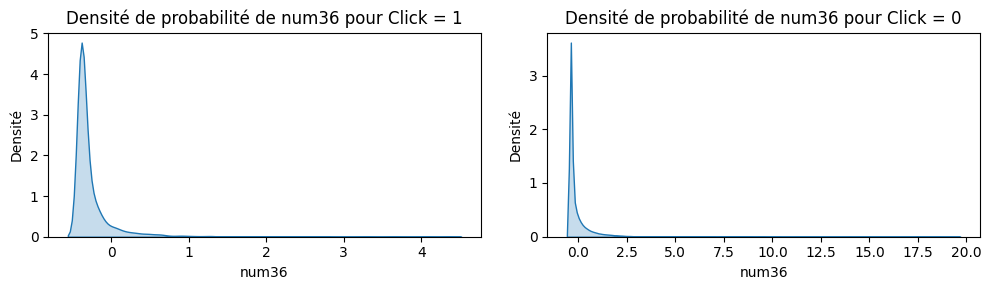

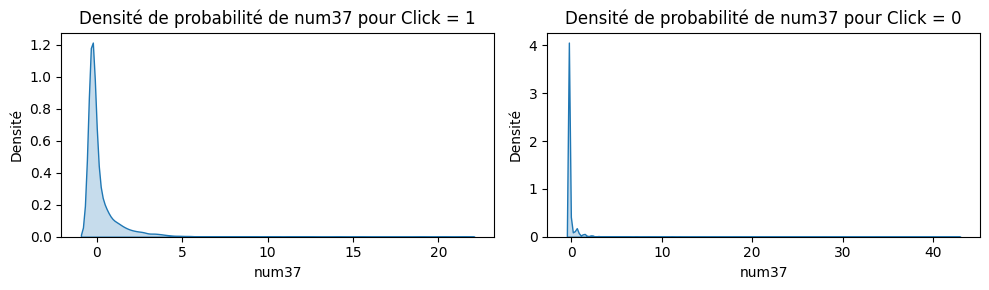

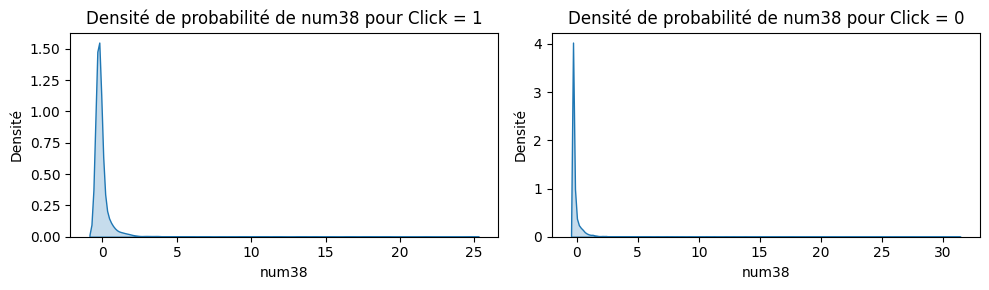

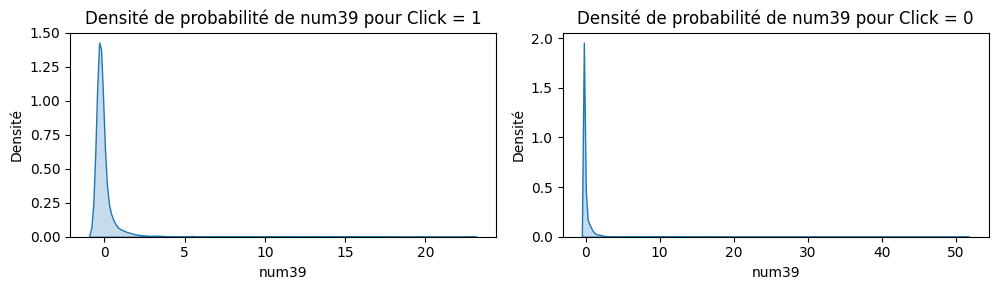

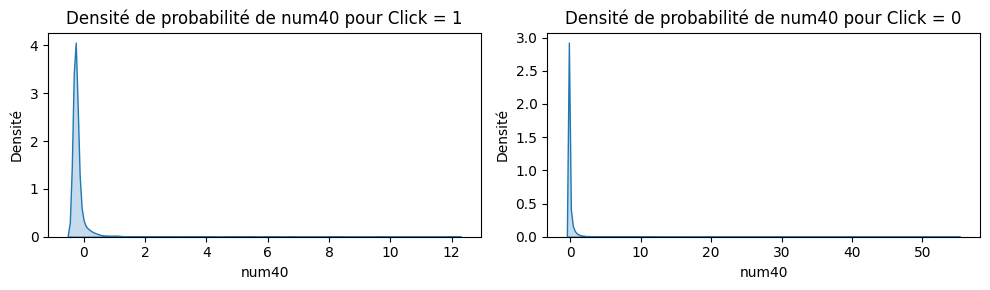

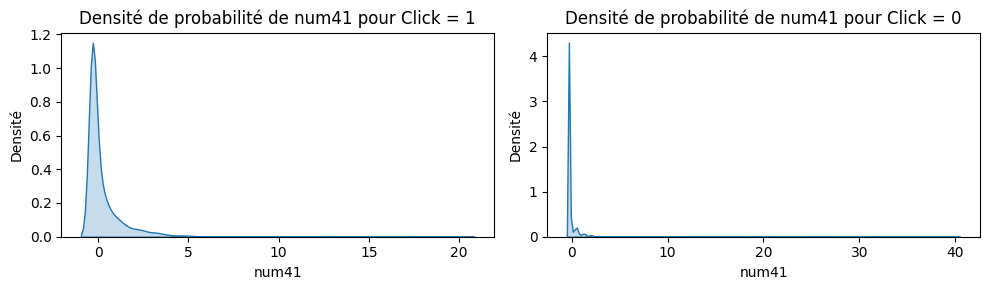

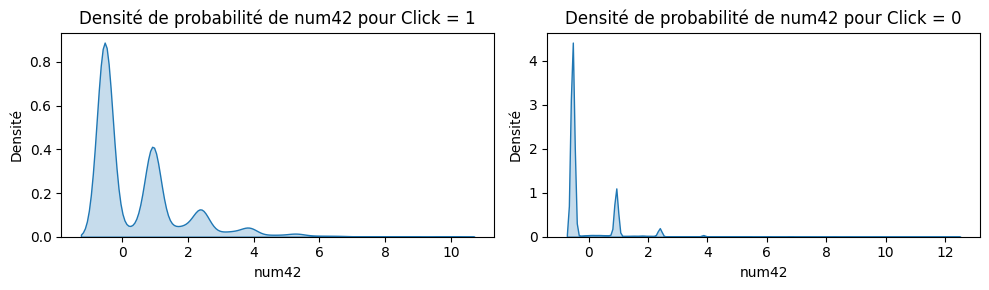

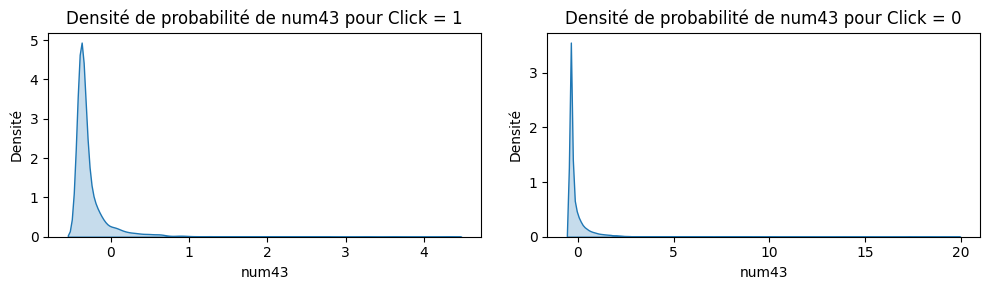

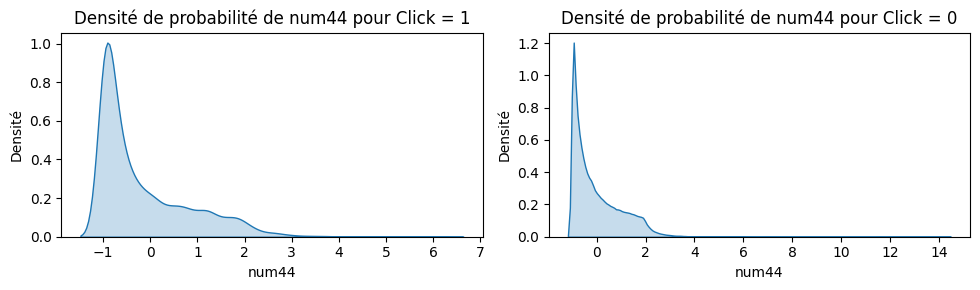

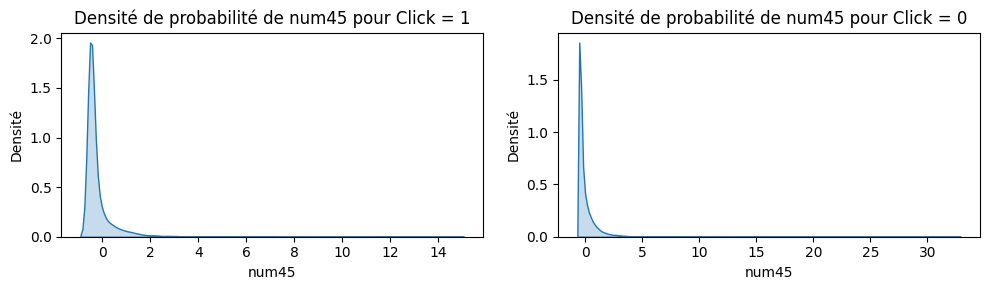

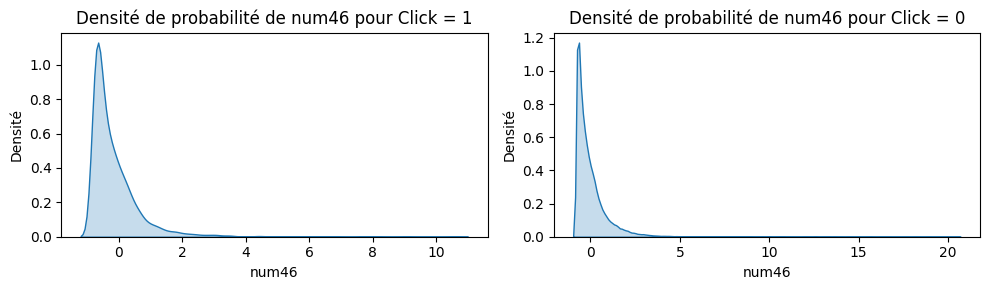

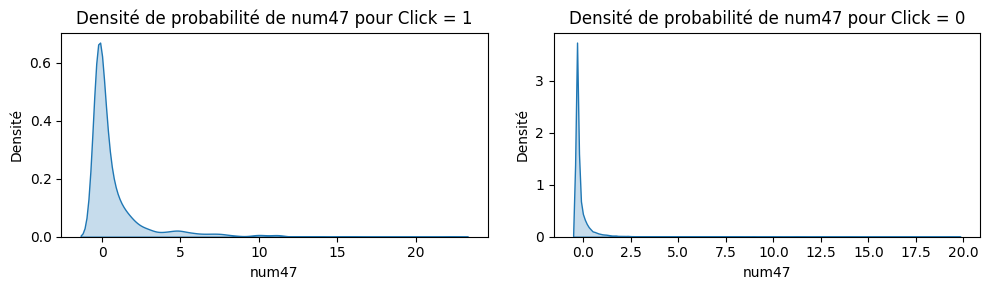

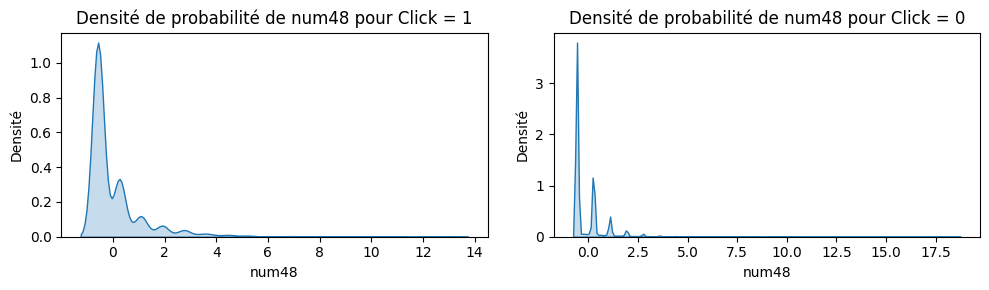

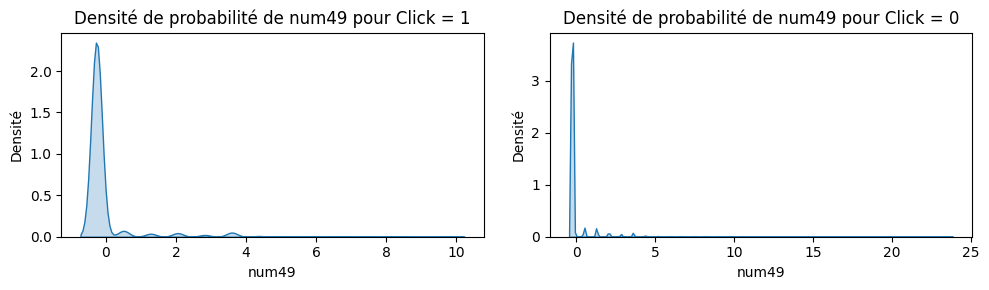

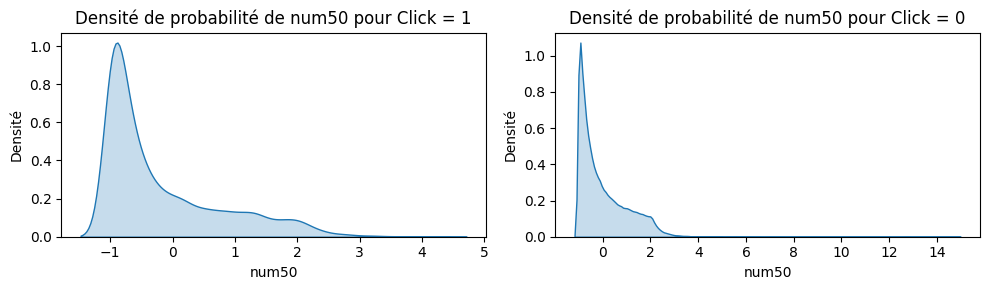

In [13]:
for i in range(16, 51):
    plt.figure(figsize=(10, 3))
    
    # Plot for click = 1
    plt.subplot(1, 2, 1)
    sns.kdeplot(data=df[df['click'] == 1], x=f'num{i}', fill=True)
    plt.title(f'Densité de probabilité de num{i} pour Click = 1')
    plt.xlabel(f'num{i}')
    plt.ylabel('Densité')
    
    # Plot for click = 0
    plt.subplot(1, 2, 2)
    sns.kdeplot(data=df[df['click'] == 0], x=f'num{i}', fill=True)
    plt.title(f'Densité de probabilité de num{i} pour Click = 0')
    plt.xlabel(f'num{i}')
    plt.ylabel('Densité')
    
    plt.tight_layout()
    plt.show()